In [14]:
import pandas as pd               # For data manipulation (e.g., reading CSV, creating DataFrames)
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For basic visualizations (e.g., bar plots, histograms)
import seaborn as sns    

In [15]:
from scipy.stats import ttest_ind   # For independent t-test (Charles River vs MEDV)
from scipy.stats import f_oneway    # For ANOVA (AGE groups vs MEDV)
from scipy.stats import pearsonr    # For Pearson correlation (NOX vs INDUS)
import statsmodels.api as sm  

In [16]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

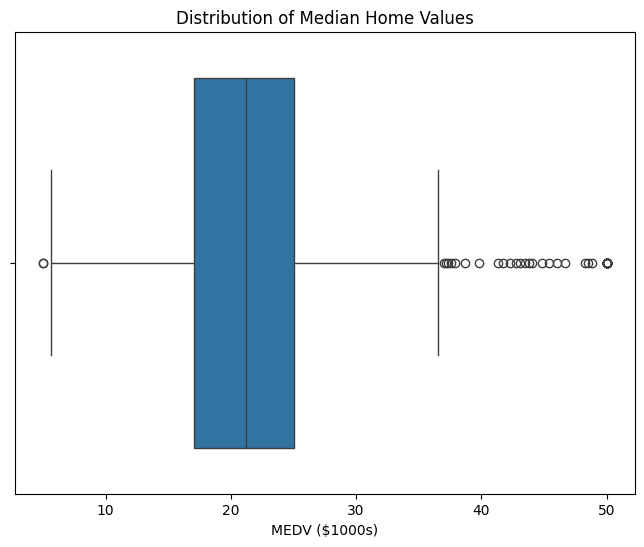

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Distribution of Median Home Values')
plt.xlabel('MEDV ($1000s)')
plt.show()

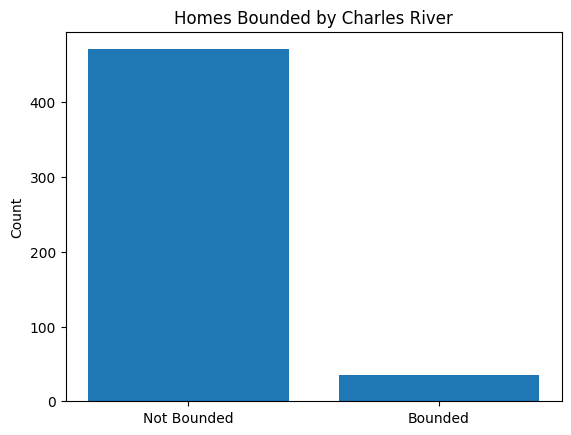

In [18]:
chas_counts = boston_df['CHAS'].value_counts()
plt.bar(['Not Bounded', 'Bounded'], chas_counts)
plt.title('Homes Bounded by Charles River')
plt.ylabel('Count')
plt.show()

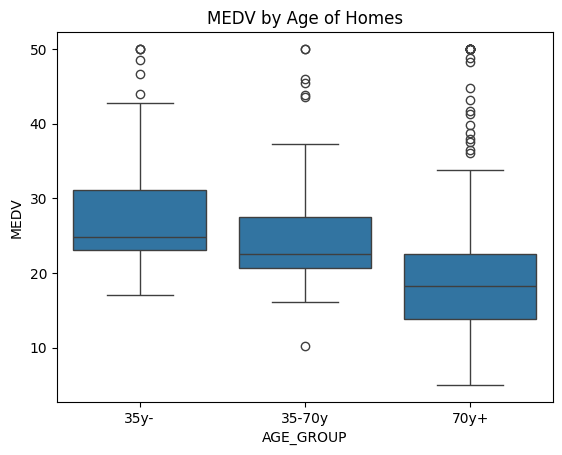

In [19]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35y-', '35-70y', '70y+'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('MEDV by Age of Homes')
plt.show()

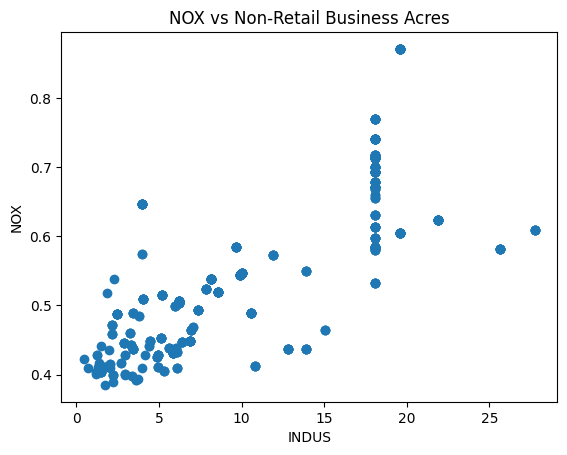

In [20]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('NOX vs Non-Retail Business Acres')
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.show()

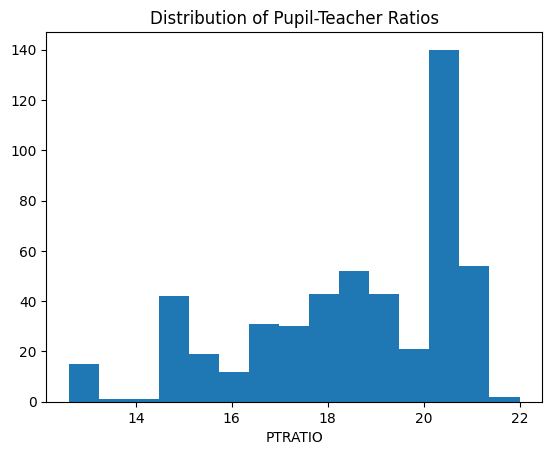

In [21]:
plt.hist(boston_df['PTRATIO'], bins=15)
plt.title('Distribution of Pupil-Teacher Ratios')
plt.xlabel('PTRATIO')
plt.show()

In [22]:
# Define the groups
medv_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Bounded by the river
medv_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Not bounded by the river

# Run the t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(medv_1, medv_0, equal_var=False)
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

t-statistic: 3.11, p-value: 0.0036


In [23]:
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['35y-', '35-70y', '70y+']
)
group1 = boston_df[boston_df['AGE_GROUP'] == '35y-']['MEDV']  # ≤35 years
group2 = boston_df[boston_df['AGE_GROUP'] == '35-70y']['MEDV']  # 35–70 years
group3 = boston_df[boston_df['AGE_GROUP'] == '70y+']['MEDV']   # ≥70 years
f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4e}")

F-statistic: 36.41, p-value: 1.7105e-15


In [24]:
r, p = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"r = {r:.2f}, p-value: {p:.4e}")

r = 0.76, p-value: 7.9134e-98


In [25]:
import statsmodels.api as sm
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        18:43:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0